For comparing the data taken around the MSR area in summer 2019 to the mapping data from fall 2022.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import uproot as up
from stl import mesh
from mpl_toolkits import mplot3d
import pandas as pd
import sys, os
from matplotlib import cm

In [77]:
%matplotlib inline

def PlotComponents(data, Compare=False, fsize=(20,6), lims=None, title=None):
    
    fig = plt.figure(figsize=fsize)
    ax1 = fig.add_subplot(1, 3, 1, projection='3d')
    ax2 = fig.add_subplot(1, 3, 2, projection='3d')
    ax3 = fig.add_subplot(1, 3, 3, projection='3d')
    fig.suptitle(title)     
    
    if lims is not None:
        Xvmin, Xvmax = lims[0]
        Yvmin, Yvmax = lims[1]
        Zvmin, Zvmax = lims[2]
    else:
        Xvmin, Xvmax = [None,None]
        Yvmin, Yvmax = [None,None]
        Zvmin, Zvmax = [None,None]

    axes = [ax1, ax2, ax3]
    
    #  ['PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu', 'RdYlBu',
    #                       'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic'])
    if Compare:
        Q_19 = ax1.scatter(data['x'], data['y'], data['z'],c=data['dB_x'], s=.5, 
                           alpha=1, cmap=cm.PiYG, vmin=Xvmin, vmax=Xvmax)
        cbar_19 = fig.colorbar(Q_19, label='$dB_x (\mu T)$', ax=ax1, pad=0.1)
        ax1.set_title("$dB_x$")

        Q_22 = ax2.scatter(data['x'], data['y'], data['z'],c=data['dB_y'], s=1, 
                           alpha=1, cmap=cm.PRGn, vmin=Yvmin, vmax=Yvmax)
        cbar_22 = fig.colorbar(Q_22, label='$dB_y (\mu T)$', ax=ax2, pad=0.1)
        ax2.set_title("$dB_y$")

        Q_19 = ax3.scatter(data['x'], data['y'], data['z'],c=data['dB_z'], s=.5, 
                           alpha=1, cmap=cm.PuOr, vmin=Zvmin, vmax=Zvmax)
        cbar_19 = fig.colorbar(Q_19, label='$dB_z (\mu T)$', ax=ax3, pad=0.1)
        ax3.set_title("$dB_z$")

    else:

        Q_19 = ax1.scatter(data['x'], data['y'], data['z'],c=data['B_x'], s=.5, 
                           alpha=1, cmap=cm.PiYG)
        
        cbar_19 = fig.colorbar(Q_19, label='$B_x (\mu T)$', ax=ax1, pad=0.1)
        ax1.set_title("$B_x$")

        Q_22 = ax2.scatter(data['x'], data['y'], data['z'],c=data['B_y'], s=1, 
                           alpha=1, cmap=cm.PRGn)
        cbar_22 = fig.colorbar(Q_22, label='$B_y (\mu T)$', ax=ax2, pad=0.1)
        ax2.set_title("$B_y$")

        Q_19 = ax3.scatter(data['x'], data['y'], data['z'],c=data['B_z'], s=.5, 
                           alpha=1, cmap=cm.PuOr)
        cbar_19 = fig.colorbar(Q_19, label='$B_z (\mu T)$', ax=ax3, pad=0.1)
        ax3.set_title("$B_z$")
        
    for a in axes:
#         a.view_init(elev=30., azim=-5)
        a.set_xlabel('x [cm]')
        a.set_ylabel('y [cm]')
        a.set_zlabel('z [cm]')

    plt.show()

In [2]:
colNames = ['x', 'y', 'z','B_x', 'B_y', 'B_z']

file_22 = "data_export/map_referencedMSR_fall2022_together_interp50.txt"
data_22 = pd.read_csv(file_22, comment='#', sep='\t', names=colNames)

file_19 = "../MagMapping-export_TH_2019/data_export/map_referencedMSR_interp50.txt"
data_19 = pd.read_csv(file_19, comment='#', sep='\t', names=colNames)

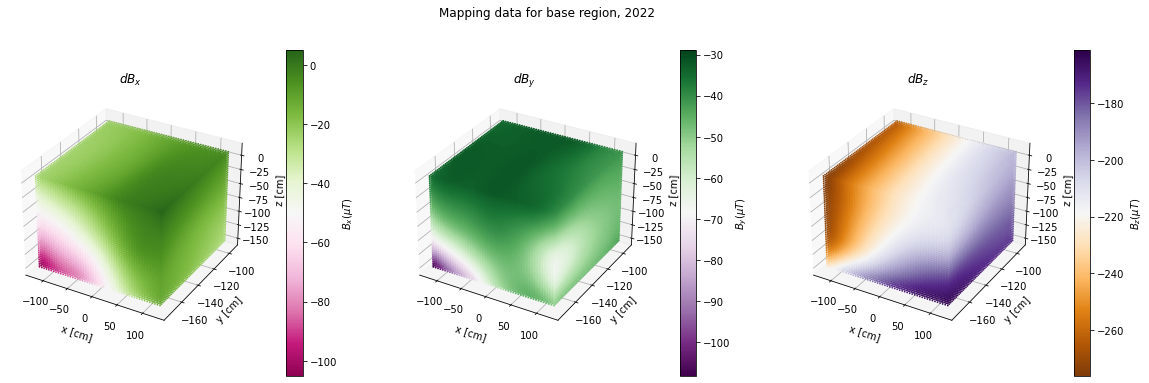

In [82]:
titleS = "Mapping data for base region, 2022"
PlotComponents(data_22, Compare=False, title=titleS)

In [3]:
# print("2019 limits:")
mins_19 = np.min(data_19)
max_19 = np.max(data_19)

# print("2022 limits:")
mins_22 = np.min(data_22)
max_22 = np.max(data_22)

whichMin = mins_19 > mins_22
whichMax = max_19 < max_22

minsAll = mins_19[whichMin].append(mins_22[~whichMin])
maxsAll = max_19[whichMax].append(max_22[~whichMax])

# print("mins:", minsAll)
# print("max:", maxsAll)

print(  f"x_min, x_max = {minsAll['x']}, {maxsAll['x']} \n" +
        f"y_min, y_max = {minsAll['y']}, {maxsAll['y']} \n"+
        f"z_min, z_max = {minsAll['z']}, {maxsAll['z']}")

x_min, x_max = -90.1, 123.60939 
y_min, y_max = -174.71133, -94.61279 
z_min, z_max = -150.75165, 9.257800000000003


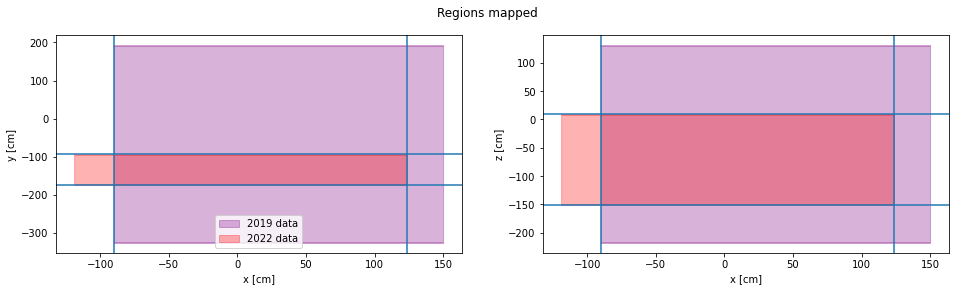

In [13]:
%matplotlib inline

x_min, x_max = -90.1, 123.60939 
y_min, y_max = -174.71133, -94.61279 
z_min, z_max = -150.75165, 9.257800000000003

fig, axs = plt.subplots(1, 2, figsize=(16,4))
plt.suptitle("Regions mapped")

minY_19 = np.min(data_19['y'])
maxY_19 = np.max(data_19['y'])
minY_22 = np.min(data_22['y'])
maxY_22 = np.max(data_22['y'])

axs[0].fill_between(data_19['x'], minY_19, maxY_19, color='purple',alpha=.3, label='2019 data')
axs[0].fill_between(data_22['x'], minY_22, maxY_22, color='r',alpha=.3, label='2022 data')

axs[0].axvline(x_min)
axs[0].axvline(x_max)
axs[0].axhline(y_min)
axs[0].axhline(y_max)


axs[0].set_xlabel('x [cm]')
axs[0].set_ylabel('y [cm]')
axs[0].legend()

minZ_19 = np.min(data_19['z'])
maxZ_19 = np.max(data_19['z'])
minZ_22 = np.min(data_22['z'])
maxZ_22 = np.max(data_22['z'])

axs[1].fill_between(data_19['x'], minZ_19, maxZ_19, color='purple',alpha=.3)
axs[1].fill_between(data_22['x'], minZ_22, maxZ_22, color='r',alpha=.3)

axs[1].axvline(x_min)
axs[1].axvline(x_max)
axs[1].axhline(z_min)
axs[1].axhline(z_max)

axs[1].set_xlabel('x [cm]')
axs[1].set_ylabel('z [cm]')

plt.show()

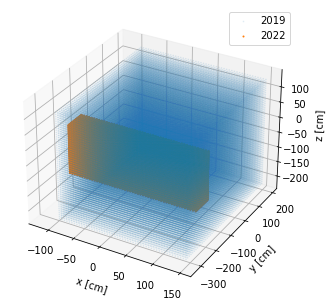

In [5]:
%matplotlib inline 
#widget
fig = plt.figure() #figsize=(11, 5)
axes = mplot3d.Axes3D(fig)

Q_19 = axes.scatter(data_19['x'], data_19['y'], data_19['z'], s=.5, alpha=.1, label="2019")
Q_22 = axes.scatter(data_22['x'], data_22['y'], data_22['z'], s=1, alpha=1, label="2022" )

axes.set_xlabel('x [cm]')
axes.set_ylabel('y [cm]')
axes.set_zlabel('z [cm]')
axes.legend()
plt.show()

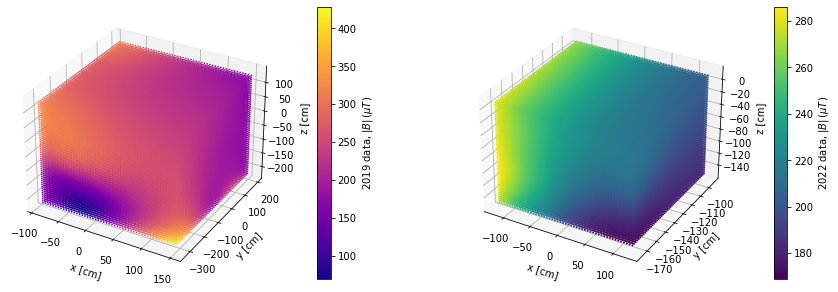

In [6]:
%matplotlib inline

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax2 = fig.add_subplot(1, 2, 2, projection='3d')

B1_19 = np.sqrt(data_19['B_x']**2 + data_19['B_y']**2 + data_19['B_z']**2 )*100 #muT
Q_19 = ax1.scatter(data_19['x'], data_19['y'], data_19['z'],c=B1_19, s=.5, alpha=1, cmap=cm.plasma)

cbar_19 = fig.colorbar(Q_19, label='2019 data, $|B|\,(\mu T)$', ax=ax1, pad=0.1)

B1_22 = np.sqrt(data_22['B_x']**2 + data_22['B_y']**2 + data_22['B_z']**2 ) #muT
Q_22 = ax2.scatter(data_22['x'], data_22['y'], data_22['z'],c=B1_22, s=1, alpha=1, cmap=cm.viridis)

cbar_22 = fig.colorbar(Q_22, label='2022 data, $|B|\,(\mu T)$', ax=ax2, pad=0.1)

ax1.set_xlabel('x [cm]')
ax1.set_ylabel('y [cm]')
ax1.set_zlabel('z [cm]')
ax2.set_xlabel('x [cm]')
ax2.set_ylabel('y [cm]')
ax2.set_zlabel('z [cm]')
plt.show()

# Cut files for matching

In [7]:
cut_22 = "data_export/map_referencedMSR_fall2022_together_CUT_interp50.txt"
dataCut_22 = pd.read_csv(cut_22, comment='#', sep='\t', names=colNames)

#the data in this file for the B field is 
cut_19 = "../MagMapping-export_TH_2019/data_export/map_referencedMSR_interp_CUT_interp50.txt"
dataCut_19 = pd.read_csv(cut_19, comment='#', sep='\t', names=colNames)

print("2019 limits:")
mins_19 = np.min(dataCut_19)
max_19 = np.max(dataCut_19)
print(mins_19,'\n', max_19)

print("2022 limits:")
mins_22 = np.min(dataCut_22)
max_22 = np.max(dataCut_22)

print(mins_22, '\n',max_22)


2019 limits:
x      -90.100000
y     -174.711330
z     -150.751650
B_x   -103.579643
B_y    -79.578744
B_z   -256.526638
dtype: float64 
 x      123.609390
y      -94.612790
z        9.257800
B_x     -5.617606
B_y    -32.184553
B_z   -156.833015
dtype: float64
2022 limits:
x      -90.100000
y     -174.711330
z     -150.751650
B_x    -94.285496
B_y    -94.418055
B_z   -263.919420
dtype: float64 
 x      123.609390
y      -94.612790
z        9.257800
B_x      5.140000
B_y    -28.791676
B_z   -160.995889
dtype: float64


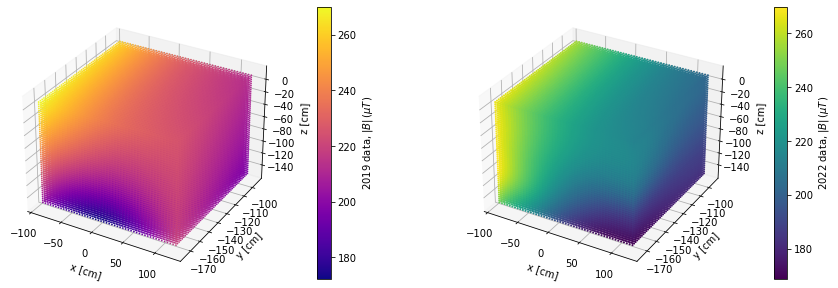

In [8]:
%matplotlib inline

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax2 = fig.add_subplot(1, 2, 2, projection='3d')

B1_19 = np.sqrt(dataCut_19['B_x']**2 + dataCut_19['B_y']**2 + dataCut_19['B_z']**2 )#muT
Q_19 = ax1.scatter(dataCut_19['x'], dataCut_19['y'], dataCut_19['z'],c=B1_19, s=.5, alpha=1, cmap=cm.plasma)

cbar_19 = fig.colorbar(Q_19, label='2019 data, $|B|\,(\mu T)$', ax=ax1, pad=0.1)

B1_22 = np.sqrt(dataCut_22['B_x']**2 + dataCut_22['B_y']**2 + dataCut_22['B_z']**2 ) #muT
Q_22 = ax2.scatter(dataCut_22['x'], dataCut_22['y'], dataCut_22['z'],c=B1_22, s=1, alpha=1, cmap=cm.viridis)

cbar_22 = fig.colorbar(Q_22, label='2022 data, $|B|\,(\mu T)$', ax=ax2, pad=0.1)

ax1.set_xlabel('x [cm]')
ax1.set_ylabel('y [cm]')
ax1.set_zlabel('z [cm]')
ax2.set_xlabel('x [cm]')
ax2.set_ylabel('y [cm]')
ax2.set_zlabel('z [cm]')
plt.show()

In [9]:
# list(dataCut_19.columns)

df_compare = dataCut_19.join(dataCut_22, rsuffix='_22', how='outer')
#                               on=list(dataCut_22.columns))

# df_compare.loc[0]['x_19'] = 0
# display(df_compare.columns)
df_compare = df_compare.where((df_compare['x']==df_compare['x_22']) & 
                                      (df_compare['y']==df_compare['y_22']) &
                                      (df_compare['z']==df_compare['z_22']))
df_compare = df_compare.drop(columns=['x_22', 'y_22', 'z_22'])
# display(df_compare)

df_compare['dB_x'] = df_compare['B_x'] - df_compare['B_x_22'] 
df_compare['dB_y'] = df_compare['B_y'] - df_compare['B_y_22'] 
df_compare['dB_z'] = df_compare['B_z'] - df_compare['B_z_22'] 

# display(df_compare)

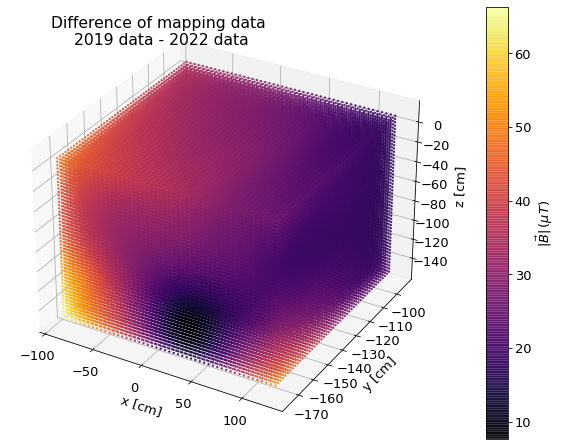

mean 24.454766174402355
std 7.465581494819152


In [10]:
%matplotlib inline

plt.rcParams['font.size'] = '13'

fig = plt.figure(figsize=(13, 6))
axes = mplot3d.Axes3D(fig)
fig.suptitle("Difference of mapping data\n 2019 data - 2022 data")

B1_diff = np.sqrt(df_compare['dB_x']**2 + df_compare['dB_y']**2 + df_compare['dB_z']**2 ) #muT
Q_22 = axes.scatter(df_compare['x'], df_compare['y'], df_compare['z'],c=B1_diff, s=2, alpha=.8, cmap=cm.inferno)

cbar_22 = fig.colorbar(Q_22, label='$|\\vec{B}|\,(\mu T)$', pad=0.05)

# plt.subplots_adjust(wspace=4.0)
axes.set_xlabel('x [cm]')
axes.set_ylabel('y [cm]', labelpad=7)
axes.set_zlabel('z [cm]', labelpad=7)
plt.show()
print("mean", np.mean(B1_diff))
print("std", np.std(B1_diff))

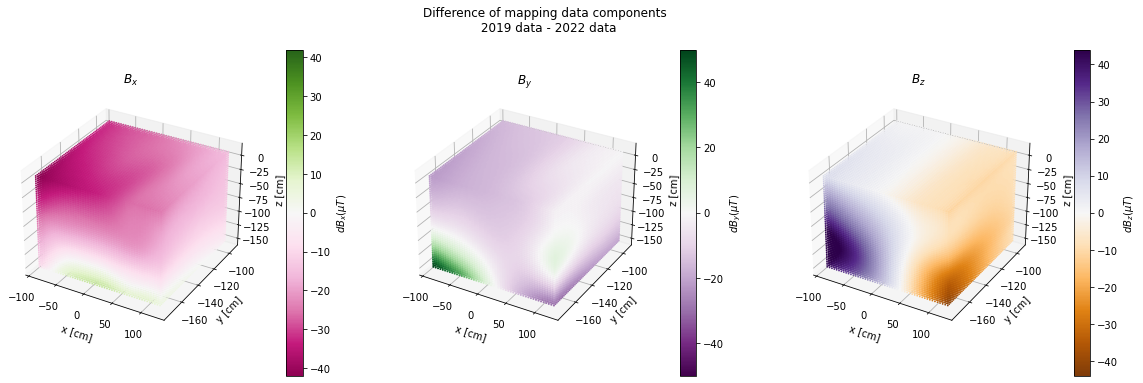

In [79]:
limsA = np.array([[-42, 42], [-50, 50], [-44, 44]])
titleS = "Difference of mapping data components \n 2019 data - 2022 data"
PlotComponents(df_compare, Compare=True, lims=limsA, title=titleS)


In [12]:
print("mean (x,y,z): ", np.mean(df_compare['dB_x']), np.mean(df_compare['dB_y']), 
      np.mean(df_compare['dB_z']))
print("STD (x,y,z): ", np.std(df_compare['dB_x']), np.std(df_compare['dB_y']), 
      np.std(df_compare['dB_z']))

mean (x,y,z):  -16.79683725262247 -6.654554952087327 5.52693342547019
STD (x,y,z):  8.56961242513111 7.211486929980489 13.09056371785573


## Stairs data

In [17]:
colNames = ['x', 'y', 'z','B_x', 'B_y', 'B_z']

file_22_s = "data_export/map_referencedMSR_fall2022_stairs_interp50.txt"
data_22_s = pd.read_csv(file_22_s, comment='#', sep='\t', names=colNames)

In [19]:
# print("2022 limits:")
mins_22 = np.min(data_22_s)
max_22 = np.max(data_22_s)

# print("mins:", minsAll)
# print("max:", maxsAll)

print(  f"x_min, x_max = {mins_22['x']}, {max_22['x']} \n" +
        f"y_min, y_max = {mins_22['y']}, {max_22['y']} \n"+
        f"z_min, z_max = {mins_22['z']}, {max_22['z']}")

x_min, x_max = -136.91688, -56.91688 
y_min, y_max = -310.16409, -300.16409 
z_min, z_max = -71.89625999999998, 8.103740000000016


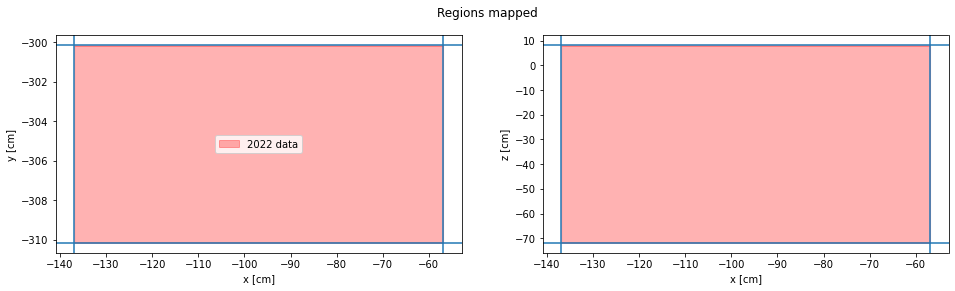

In [24]:
%matplotlib inline

x_min, x_max = -136.91688, -56.91688 
y_min, y_max = -310.16409, -300.16409 
z_min, z_max = -71.89625999999998, 8.103740000000016

fig, axs = plt.subplots(1, 2, figsize=(16,4))
plt.suptitle("Regions mapped")

minY_22 = np.min(mins_22['y'])
maxY_22 = np.max(max_22['y'])

axs[0].fill_between(data_22_s['x'], minY_22, maxY_22, color='r',alpha=.3, label='2022 data')

axs[0].axvline(x_min)
axs[0].axvline(x_max)
axs[0].axhline(y_min)
axs[0].axhline(y_max)

axs[0].set_xlabel('x [cm]')
axs[0].set_ylabel('y [cm]')
axs[0].legend()

minZ_22 = np.min(mins_22['z'])
maxZ_22 = np.max(max_22['z'])

axs[1].fill_between(data_22_s['x'], minZ_22, maxZ_22, color='r',alpha=.3)

axs[1].axvline(x_min)
axs[1].axvline(x_max)
axs[1].axhline(z_min)
axs[1].axhline(z_max)

axs[1].set_xlabel('x [cm]')
axs[1].set_ylabel('z [cm]')

plt.show()

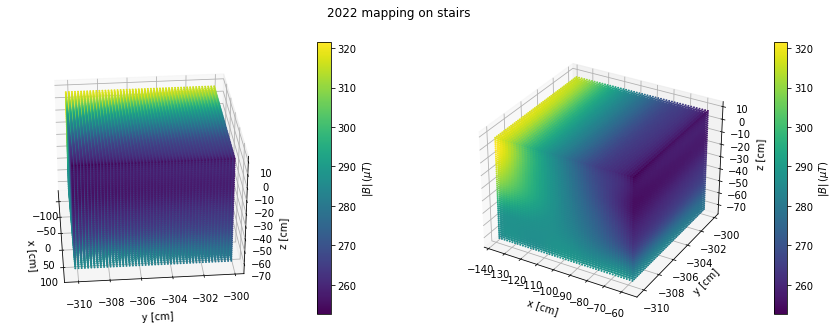

In [47]:
%matplotlib inline

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
fig.suptitle("2022 mapping on stairs")

B1_22 = np.sqrt(data_22_s['B_x']**2 + data_22_s['B_y']**2 + data_22_s['B_z']**2 ) #muT
Q_22 = ax1.scatter(data_22['x'], data_22_s['y'], data_22_s['z'],c=B1_22, s=1, alpha=1, cmap=cm.viridis)
ax1.view_init(elev=30., azim=-5)

cbar_22 = fig.colorbar(Q_22, label='$|B|\,(\mu T)$', ax=ax1, pad=0.1)

Q_22 = ax2.scatter(data_22_s['x'], data_22_s['y'], data_22_s['z'],c=B1_22, s=1, alpha=1, cmap=cm.viridis)

cbar_22 = fig.colorbar(Q_22, label='$|B|\,(\mu T)$', ax=ax2, pad=0.1)

ax1.set_xlabel('x [cm]')
ax1.set_ylabel('y [cm]')
ax1.set_zlabel('z [cm]')
ax2.set_xlabel('x [cm]')
ax2.set_ylabel('y [cm]')
ax2.set_zlabel('z [cm]')
plt.show()

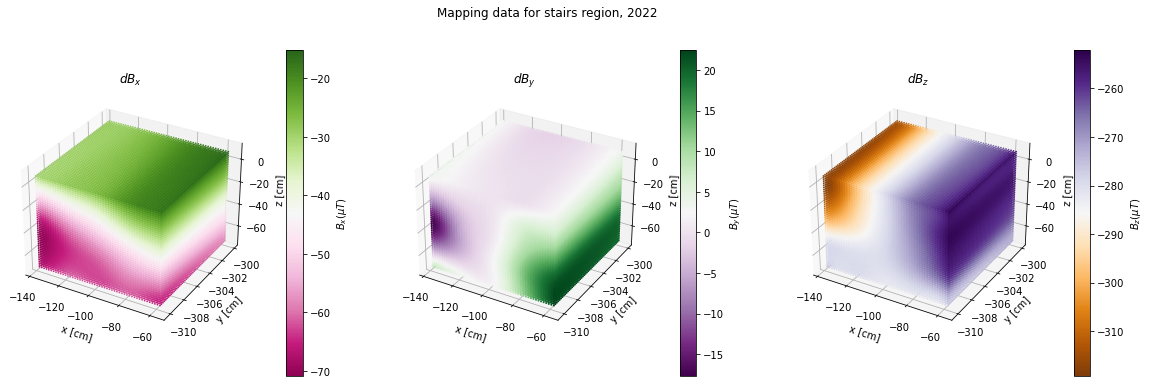

In [80]:
titleS = "Mapping data for stairs region, 2022"

PlotComponents(data_22_s, Compare=False, title=titleS)
